In [1]:
#python packages that are required
#do install them using conda in anaconda
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
path = '/Users/benstewart/BEN STUFF/PROJECTS/smart-india-hackathon/datasets/TN'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
#print(result)
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in result ])
#export to csv
path = '/Users/benstewart/BEN STUFF/PROJECTS/smart-india-hackathon/datasets'
os.chdir(path)
combined_csv.to_csv("combined_csv.csv", index=False, encoding='utf-8-sig')
path = '/Users/benstewart/BEN STUFF/PROJECTS/smart-india-hackathon'
os.chdir(path)

In [3]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
pandas==0.24.2
numpy==1.16.4
matplotlib==3.1.2
geoplot==0.4.0
geopandas==0.6.1


In [4]:
#pandas default setting changed for easier viewing
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.width = None
pd.set_option('display.expand_frame_repr', False)
#plot size ans style changed for maps
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(25,12))

In [5]:
#load the dataset from the water boards
#df = pd.read_excel(r'datasets/sample.xls')
df = pd.read_csv(r'datasets/combined_csv.csv')

In [6]:
#number of rows and columns
df.shape

(18887, 14)

In [7]:
#first five rows of the dataset
df.head()

,STATE,DISTRICT,TEH_NAME,BLOCK_NAME,LAT,LON,SITE_NAME,SITE_TYPE,WLCODE,YEAR_OBS,MONSOON,POMRB,POMKH,PREMON
0,TN,Thoothukkudi,Sattankulam,Sathankulam,8.433333,77.902778,Satankulam,Bore Well,W02735,2018,9.55,3.67,NaN,NaN
1,TN,Thoothukkudi,Vilathikulam,Vilathikulam,9.150000,78.166667,Karisalkulam,Dug Well,W23095,2018,12.26,NaN,NaN,10.46
2,TN,Thoothukkudi,Sattankulam,Udangudi,8.400000,78.054167,Kulasekharaptnm,Dug Well,W02738,2018,4.04,2.51,NaN,NaN
3,TN,Thoothukkudi,Sattankulam,Udangudi,8.437500,77.973611,Nazareth,Dug Well,W02733,2018,4.85,2.35,NaN,NaN
4,TN,Thoothukkudi,Sattankulam,Alwarthirunagiri,8.518056,77.855556,Paikulam,Bore Well,W20313,2018,11.35,9.92,NaN,NaN


In [8]:
# sort based on the state and district in alphabetical order
df = df.sort_values(['STATE', 'DISTRICT', 'TEH_NAME', 'BLOCK_NAME'], ascending=[True, True, True, True])
df[['MONSOON','POMRB','POMKH','PREMON']] = df[['MONSOON','POMRB','POMKH','PREMON']].apply(pd.to_numeric, errors='coerce')

In [9]:
#view the whole dataframe
#df

In [10]:
# loading the shapefile for the india districts map as a GEOdataframe
#fp = "map/set2/IND_adm2.shp"
fp = "map/tn.json"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,cartodb_id,censuscode,dt_cen_cd,st_cen_cd,st_nm,district,geometry
0,175,610,9,33,Tamil Nadu,Erode,"MULTIPOLYGON (((77.49980 11.11443, 77.49980 11..."
1,449,621,20,33,Tamil Nadu,Pudukkottai,"MULTIPOLYGON (((78.73673 10.67020, 78.73842 10..."
2,535,622,21,33,Tamil Nadu,Sivaganga,"MULTIPOLYGON (((78.49133 10.38855, 78.49710 10..."
3,563,620,19,33,Tamil Nadu,Thanjavur,"MULTIPOLYGON (((79.52558 11.17887, 79.53069 11..."
4,567,602,1,33,Tamil Nadu,Thiruvallur,"MULTIPOLYGON (((80.30879 13.46826, 80.31027 13..."


In [11]:
#drop unwanted columns
#map_df = map_df.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'ID_2', 'TYPE_2', 'ENGTYPE_2', 'NL_NAME_2'])
map_df = map_df.drop(columns=['cartodb_id', 'censuscode', 'dt_cen_cd', 'st_cen_cd'])

In [12]:
#rename the columns for easy access
print(map_df.columns)
#map_df.columns = ['STATE', 'DISTRICT', 'OTHER', 'geometry'] 
map_df.columns = ['STATE', 'DISTRICT', 'geometry'] 

Index(['st_nm', 'district', 'geometry'], dtype='object')


In [13]:
#print the map GEOdataframe
map_df

,STATE,DISTRICT,geometry
0,Tamil Nadu,Erode,"MULTIPOLYGON (((77.49980 11.11443, 77.49980 11..."
1,Tamil Nadu,Pudukkottai,"MULTIPOLYGON (((78.73673 10.67020, 78.73842 10..."
2,Tamil Nadu,Sivaganga,"MULTIPOLYGON (((78.49133 10.38855, 78.49710 10..."
3,Tamil Nadu,Thanjavur,"MULTIPOLYGON (((79.52558 11.17887, 79.53069 11..."
4,Tamil Nadu,Thiruvallur,"MULTIPOLYGON (((80.30879 13.46826, 80.31027 13..."
5,Tamil Nadu,Thiruvarur,"MULTIPOLYGON (((79.70312 11.01327, 79.70713 11..."
6,Tamil Nadu,Thoothukkudi,"MULTIPOLYGON (((78.17017 9.36798, 78.16822 9.3..."
7,Tamil Nadu,Tiruchirappalli,"MULTIPOLYGON (((78.66535 11.37201, 78.66538 11..."
8,Tamil Nadu,Tirunelveli,"MULTIPOLYGON (((77.84817 9.24215, 77.84933 9.2..."
9,Tamil Nadu,Tiruppur,"MULTIPOLYGON (((77.22728 11.34388, 77.22010 11..."


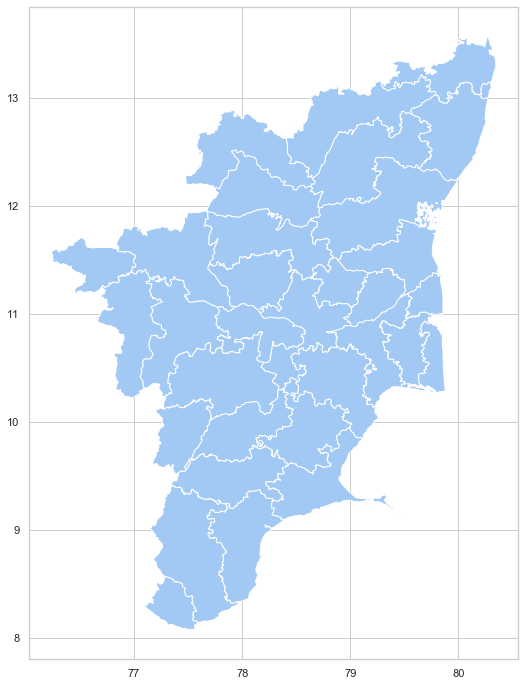

In [14]:
#plot the map of india districts
map_df.plot()

In [15]:
#make the GEOdataframe keys same as that in the dataset
#map_df['DISTRICT'] = map_df.DISTRICT.str.upper()
#map_df['STATE'] = map_df.STATE.str.upper()
map_df['STATE'] = 'TN'
map_df.head()

,STATE,DISTRICT,geometry
0,TN,Erode,"MULTIPOLYGON (((77.49980 11.11443, 77.49980 11..."
1,TN,Pudukkottai,"MULTIPOLYGON (((78.73673 10.67020, 78.73842 10..."
2,TN,Sivaganga,"MULTIPOLYGON (((78.49133 10.38855, 78.49710 10..."
3,TN,Thanjavur,"MULTIPOLYGON (((79.52558 11.17887, 79.53069 11..."
4,TN,Thiruvallur,"MULTIPOLYGON (((80.30879 13.46826, 80.31027 13..."


In [16]:
#left join the GEOdataframe on the dataset
df = df.join(map_df.set_index(['DISTRICT','STATE']), on=['DISTRICT','STATE'])

In [17]:
#pint the dataset
#df

In [18]:
#check how many records are null 
#to get a basic idea of the dataset
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

MONSOON    4935
POMRB      4593
POMKH      5401
PREMON     3900
dtype: int64

In [19]:
#list to fix the GEOdataframe to match as many districts as possible
print(df[df["geometry"].isnull()][['DISTRICT','STATE']])

Empty DataFrame
Columns: [DISTRICT, STATE]
Index: []


In [20]:
#plot values of water level as of Jan 2015 for districts that are in the GEOdataframe
temp_map = df[df["geometry"].notnull()][['DISTRICT','STATE','POMRB','geometry']]
temp_map.head()

,DISTRICT,STATE,POMRB,geometry
10312,Ariyalur,TN,NaN,"MULTIPOLYGON (((79.32232 11.41967, 79.32473 11..."
10285,Ariyalur,TN,NaN,"MULTIPOLYGON (((79.32232 11.41967, 79.32473 11..."
10297,Ariyalur,TN,NaN,"MULTIPOLYGON (((79.32232 11.41967, 79.32473 11..."
10302,Ariyalur,TN,16.38,"MULTIPOLYGON (((79.32232 11.41967, 79.32473 11..."
10308,Ariyalur,TN,7.62,"MULTIPOLYGON (((79.32232 11.41967, 79.32473 11..."


In [21]:
#convert the dataset to draw a map
gdf = gpd.GeoDataFrame(temp_map)

In [41]:
# normalize color
vmin, vmax, vcenter = 0, gdf['POMRB'].max()-130, gdf['POMRB'].mean()
divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cbar = plt.cm.ScalarMappable(norm=divnorm)

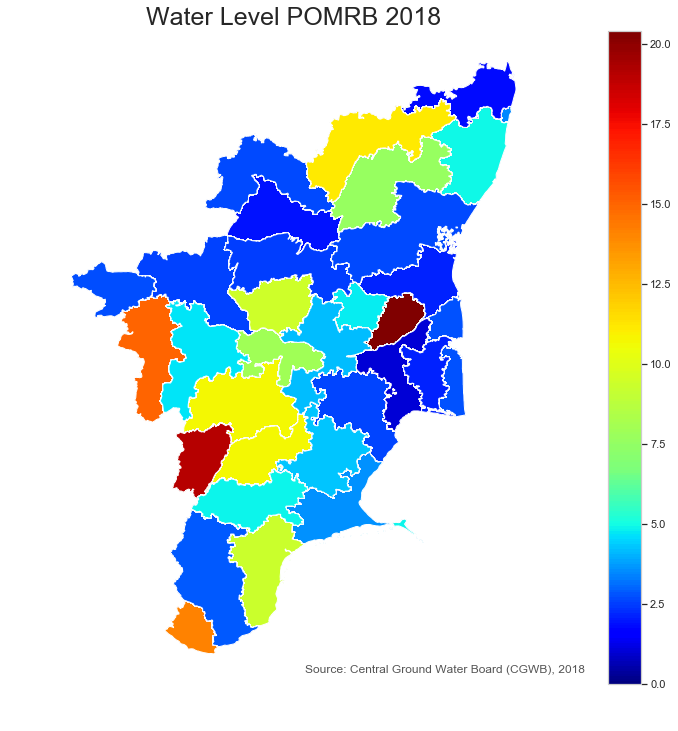

In [42]:
#draw the map
ax = gdf.dropna().plot(column='POMRB', cmap='jet', norm=divnorm, legend=True)
#add title to the map
ax.set_title('Water Level POMRB 2018', fontdict= {'fontsize':25})
#remove axes
ax.set_axis_off()
# create an annotation for the data source
txt = ax.annotate('Source: Central Ground Water Board (CGWB), 2018',xy=(0.45, .09),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')